
## **Intialization**


In [0]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Importing data

EmpAb = pd.read_excel("https://s3-ap-southeast-1.amazonaws.com/edwisor-india-bucket/projects/data/DataN0101/Absenteeism_at_work_Project.xls")

In [0]:
EmpAb.shape

(740, 21)

In [0]:
EmpAb.head()

In [0]:
EmpAb.describe()

In [0]:
EmpAb.columns

In [0]:
EmpAb.dtypes

In [0]:
EmpAb

## Data **Preparation**

In [0]:
Categorical = ['ID','Reason for absence','Month of absence','Day of the week',
               'Seasons','Son','Pet','Disciplinary failure','Education',
               'Social drinker','Social smoker']

Continuous = ['Transportation expense','Distance from Residence to Work',
              'Service time','Age','Work load Average/day ','Hit target','Weight',
              'Height','Body mass index','Absenteeism time in hours']

#Separating variables into categorical and continuous 

In [0]:
#Copying the data into new dataset for data analysis

data = EmpAb.copy()

data['ID'] = data['ID'].astype('category')

data['Reason for absence'] = data['Reason for absence'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],
                                                                  ['Undefined absence',
                                                                   'Certain infectious and parasitic diseases',
                                                                   'Neoplasms',
                                                                   'Diseases of the blood, blood-forming organs and immune mechanism disorders',
                                                                   'Endocrine, nutritional and metabolic diseases',
                                                                   'Mental and behavioural disorders',
                                                                   'Diseases of the nervous system',
                                                                   'Diseases of the eye and adnexa',
                                                                   'Diseases of the ear and mastoid process',
                                                                   'Diseases of the circulatory system',
                                                                   'Diseases of the respiratory system',
                                                                   'Diseases of the digestive system',
                                                                   'Diseases of the skin and subcutaneous tissue',
                                                                   'Diseases of the musculoskeletal system and connective tissue',
                                                                   'Diseases of the genitourinary system',
                                                                   'Pregnancy, childbirth and the puerperium',
                                                                   'Certain conditions originating in the perinatal period',
                                                                   'Congenital malformations, deformations and chromosomal abnormalities',
                                                                   'Symptoms, signs, abnormal clinical and laboratory findings, not elsewhere classified',
                                                                   'Injury, poisoning and certain other consequences of external causes',
                                                                   'External causes of morbidity and mortality',
                                                                   'Factors influencing health status and contact with health services',
                                                                   'patient follow-up',
                                                                   'medical consultation',
                                                                   'blood donation',
                                                                   'laboratory examination',
                                                                   'unjustified absence',
                                                                   'physiotherapy',
                                                                   'dental consultation']).astype('category')

data['Month of absence'] = data['Month of absence'].astype('category')

data['Day of the week'] = data['Day of the week'].replace([2,3,4,5,6],
                                                            ['Monday',
                                                             'Tuesday',
                                                             'Wednesday',
                                                             'Thrusday',
                                                             'Friday']).astype('category')

data['Seasons'] = data['Seasons'].replace([1,2,3,4],
                                            ['Summer',
                                             'Autumn',
                                             'Winter',
                                             'Spring']).astype('category')

data['Disciplinary failure'] = data['Disciplinary failure'].replace([0,1],
                                                                      ['No',
                                                                       'Yes']).astype('category')

data['Education'] = data['Education'].replace([1,2,3,4],
                                                ['High School',
                                                 'Graduate',
                                                 'Postgraduate',
                                                 'Master and Doctor']).astype('category')

data['Social drinker'] = data['Social drinker'].replace([0,1],
                                                          ['No',
                                                           'Yes']).astype('category')

data['Social smoker'] = data['Social smoker'].replace([0,1],
                                                        ['No',
                                                         'Yes']).astype('category')

data['Son'] = data['Son'].astype('category')

data['Pet'] = data['Pet'].astype('category')



## Exploratory data **analysis**

### ID

In [0]:
#Plotting the number of leaves took by particular person given ID

sns.set_style("whitegrid")
plt.gcf().set_size_inches(10,6)
sns.countplot(data=data,x='ID',)

#Employee with ID 3 and 28 took most no. of leaves

NameError: ignored

<Figure size 720x432 with 0 Axes>

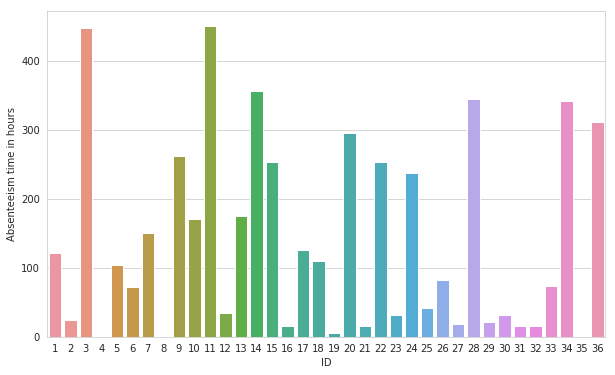

In [0]:
plt.gcf().set_size_inches(10,6)
sns.barplot(data=data,x='ID',y='Absenteeism time in hours',ci = None,estimator=sum)

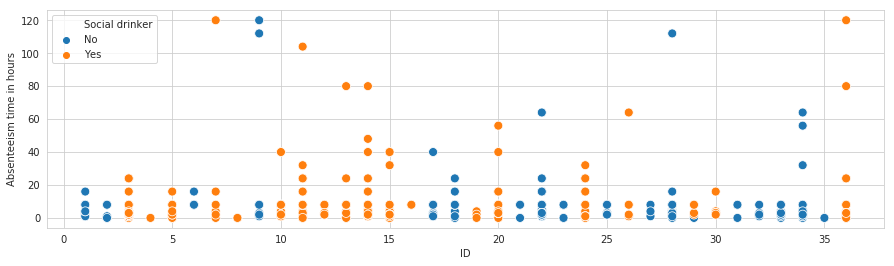

In [0]:
#Employee Absent in hours ID wise and wether employee is drinker or not

plt.gcf().set_size_inches(15,4)
sns.scatterplot(data=data,x='ID',y='Absenteeism time in hours',
                hue = 'Social drinker',s=80)

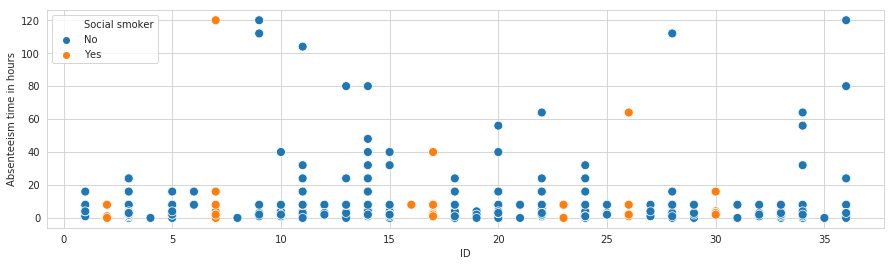

In [0]:
#Employee Absent in hours ID wise and wether employee is smoker or not

plt.gcf().set_size_inches(15,4)
sns.scatterplot(data=data,x='ID',y='Absenteeism time in hours',
                hue = 'Social smoker',s=80)

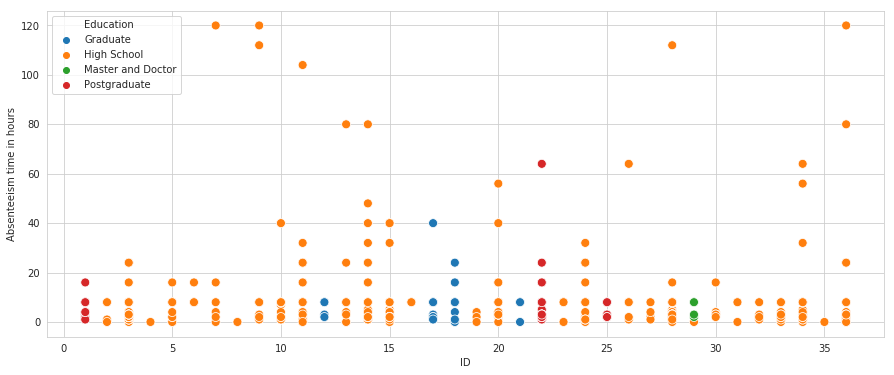

In [0]:
#Employee Absent in hours ID wise and whats is their educational qualification

plt.gcf().set_size_inches(15,6)
sns.scatterplot(data=data,x='ID',y='Absenteeism time in hours',
                hue= 'Education',s=80)

### Reason for absence

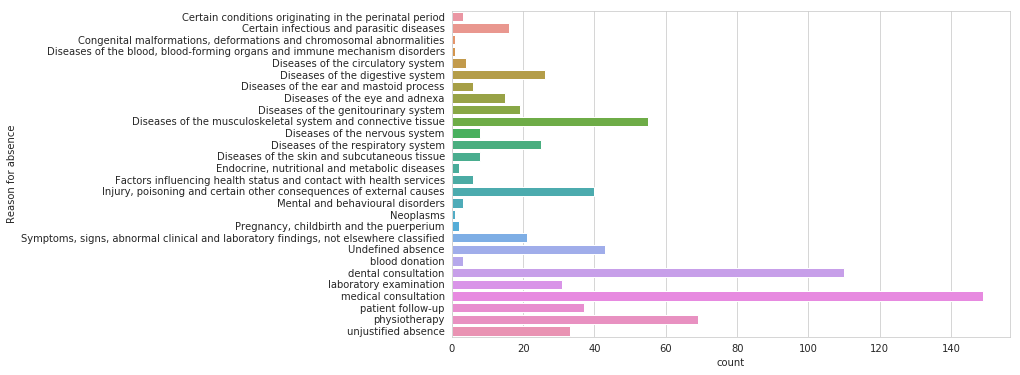

In [0]:
#Plotting the number of reason for absence

#plt.xticks(rotation=90)
plt.gcf().set_size_inches(10,6)
sns.countplot(data=data,y='Reason for absence')

#Mostly people took leave for medical consulation, Dental Consulation and physiotherapy
#And people with muscloskeletal (joint pain) also too significant leaves

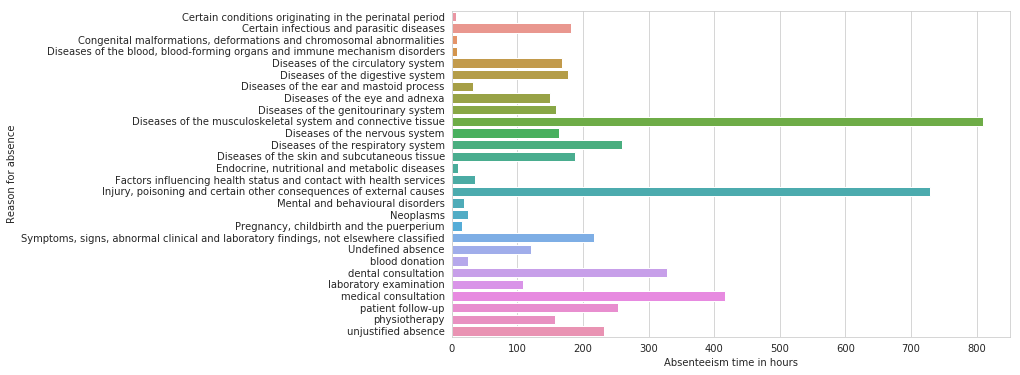

In [0]:
#distribution of Reason of absence with Absenteeism time in hours
#getting total no. of hours absent per reason

plt.gcf().set_size_inches(10,6)
sns.barplot(data=data,y='Reason for absence',x='Absenteeism time in hours',ci = None,estimator=sum)

#Here people having problem with musculoskeletal system (Joints pain) took long hours leaves followed by external causes

### Month of absence

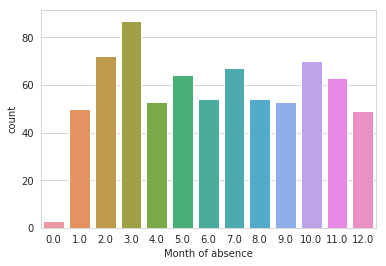

In [0]:
#No. of emoployee absent month wise

sns.countplot(data=data,x='Month of absence')

#People took leave mostly in 3rd month

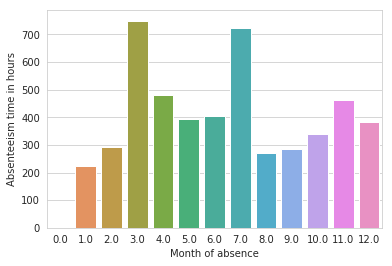

In [0]:
#Total no. of hours absence month wise

sns.barplot(data=data,x='Month of absence',y='Absenteeism time in hours',ci = None,estimator=sum)

#Employees took long leaves in 7th month also

### Day of the week

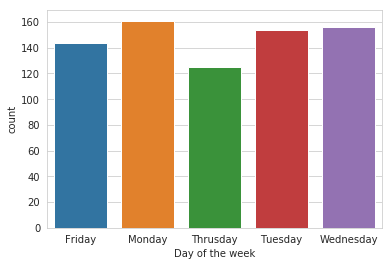

In [0]:
#Frequency of weekdays

sns.countplot(data=data,x='Day of the week')

#Employees were absent mostly on mondays and tuesdays

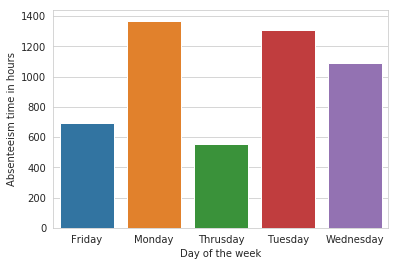

In [0]:
#Total no. of hours absent per weekday 

sns.barplot(data=data,x='Day of the week',y='Absenteeism time in hours',ci = None,estimator=sum)

#same as frequency people were absent mostly on monday and tuesday for long hours

### Seasons

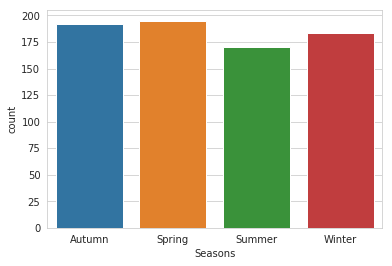

In [0]:
#Frequency of leaves season wise

sns.countplot(data=data,x='Seasons')

#people took most of leaves in spring season 

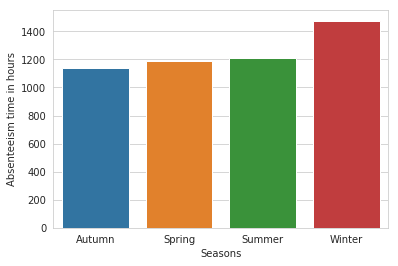

In [0]:
#Total no. of hours absent season wise

sns.barplot(data=data,x='Seasons',y='Absenteeism time in hours',ci = None,estimator=sum)

#From above an below graph we can conclude that
#Employees took small hours leave in spring and autumn but long hours leave in winter

### Disciplinary failure

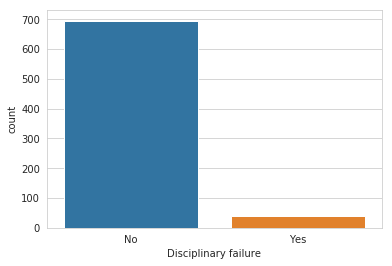

In [0]:
#Count plot of dispilinary failure

sns.countplot(data=data,x='Disciplinary failure')

#there is very less no. of people with disciplinary failure

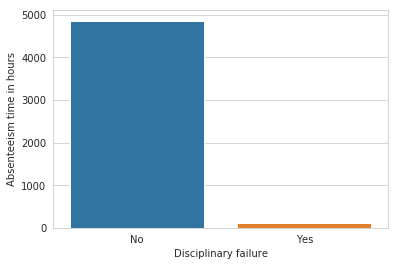

In [0]:
#Disciplinary failure with absence hours plot

sns.barplot(data=data,x='Disciplinary failure',y='Absenteeism time in hours',ci = None,estimator=sum)

#It seems people with no disciplinary failure were more absent

### Education

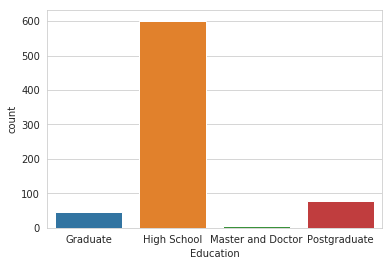

In [0]:
#No. of leaves took education wise


sns.countplot(data=data,x='Education')

#Mostly employee with high school education took more leaves

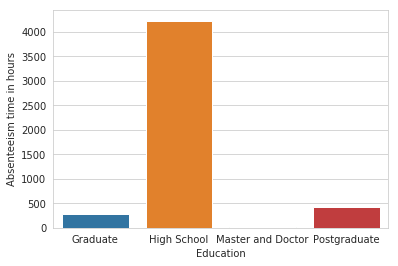

In [0]:
#Total no. of hours absent education wise

sns.barplot(data=data,x='Education',y='Absenteeism time in hours',ci = None,estimator = sum)

#High school qualified emploees were mostly absent

### Social drinker

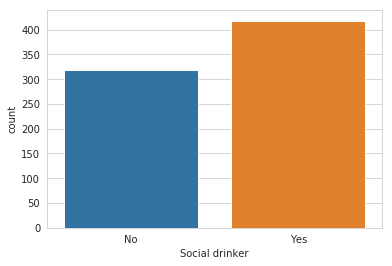

In [0]:
#counts of social driker took leaves 

sns.countplot(data=data,x='Social drinker')

#Here people with social drinking habit was absent more times

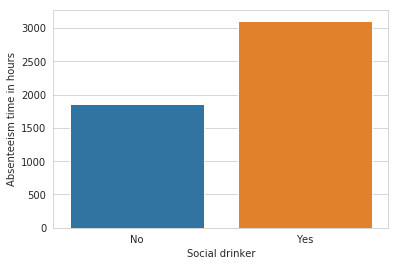

In [0]:
#Absent hours plot with Social drinker 

sns.barplot(data=data,x='Social drinker',y='Absenteeism time in hours',ci = None,estimator = sum)

#Mostly people with drinking habit was absent for longer period of time

### Social smoker

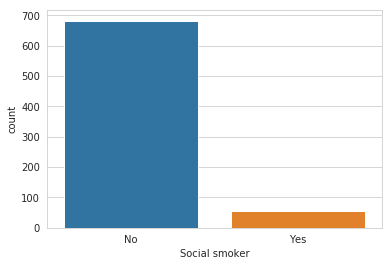

In [0]:
#Plot of social smoker

sns.countplot(data=data,x='Social smoker')

#seems like there is very few no. of people with smoking habit

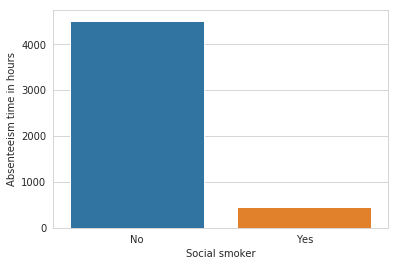

In [0]:
#Plot of Social smoker with absent hours

sns.barplot(data=data,x='Social smoker',y='Absenteeism time in hours',ci = None,estimator = sum)

#Here people with no smoking habit took long hours of leave

### Son

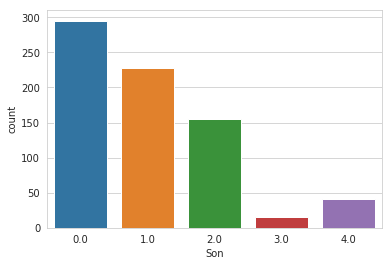

In [0]:
#Frequency of leaves taken by employees acc to no. of son they have

sns.countplot(data=data,x='Son')

#People with no son took leaves more frequently

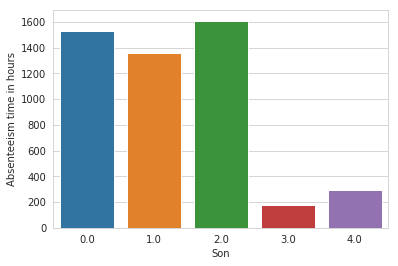

In [0]:
#Total no. of hours absent acc to no. of sons employees have

sns.barplot(data=data,x='Son',y='Absenteeism time in hours',ci = None,estimator = sum)

#Seems people with 2 and 0 Sons took long hours leave

In [0]:
for i in range(0,5):
    a = data[data['Son'] == i]
    print (i,a['Absenteeism time in hours'].sum())

In [0]:
for i in range(0,5):
    a = data[data['Son'] == i]
    print (i,a['Absenteeism time in hours'].mean())

### Pet

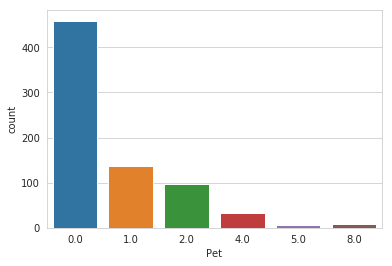

In [0]:
#Frequency of leaves taken by employees acc to no. of Pet they have

sns.countplot(data=data,x='Pet')

#People with no Pet took leaves more frequently

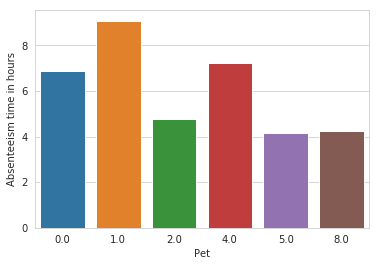

In [0]:
#Total no. of hours absent acc to no. of Pets employees have

sns.barplot(data=data,x='Pet',y='Absenteeism time in hours',ci = None)

#Seems people with 1 and 4 pets took long hours leave

### Age

In [0]:
#Frequency of leaves taken by age

plt.gcf().set_size_inches(10,4)
sns.countplot(data=data,x='Age')

#Employee of age 28 and 38 took more frequent leaves

In [0]:
#Total no of hours ansence by age

plt.gcf().set_size_inches(10,4)
sns.barplot(data=data,x='Age',y='Absenteeism time in hours',ci = None,estimator = sum)

#employees with 28 and 36 took long hours leave

### Distribution of Continuous with Target variable




Distribution of :-

Transportation expense, 
Distance from Residence to Work, 
Service time, 
Age, 
Work load Average/day, 
Hit target, 
Weight, 
Heigh, 
Body mass index</br></br>


With

Absenteeism time in hours

In [0]:
#Relation of continuous variable with target variable
sns.pairplot(data = data,
             x_vars = Continuous[0:-1],
             y_vars = Continuous[-1])

In [0]:
#Distribution of continuous variable
data[Continuous].hist(bins = 20,figsize = (15,10))

## Missing Value **Analysis**

In [421]:
print(len(EmpAb[EmpAb['Reason for absence'] == 0]))
print(len(EmpAb[EmpAb['Month of absence'] == 0]))
print(len(EmpAb[EmpAb['Absenteeism time in hours'] == 0]))


#Here dataset have some values equal to zero in Reason for absence and month of absence
#These values cannot be zero
#So these values should be replace with NA and impute afterwards

43
3
36


In [0]:
EmpAb['Reason for absence'] = EmpAb['Reason for absence'].replace(0,np.nan)
EmpAb['Month of absence'] = EmpAb['Month of absence'].replace(0,np.nan)
EmpAb['Absenteeism time in hours'] = EmpAb['Absenteeism time in hours'].replace(0,np.nan)


#Replacing 0 with NaN in Reason for absence and Month of absence

In [423]:
missingValues = pd.DataFrame(EmpAb.isnull().sum(),columns = ['No. of missing values'])

for c in EmpAb.columns:
    missingValues.loc[c,'Percent'] = (EmpAb[c].isnull().sum()/len(EmpAb))*100

missingValues

#Checking the missing number and percentage of missing values

,No. of missing values,Percent
ID,0,0.000000
Reason for absence,46,6.216216
Month of absence,4,0.540541
Day of the week,0,0.000000
Seasons,0,0.000000
Transportation expense,7,0.945946
Distance from Residence to Work,3,0.405405
Service time,3,0.405405
Age,3,0.405405
Work load Average/day,10,1.351351


In [0]:
for col in Categorical:
    EmpAb[col] = EmpAb[col].fillna(EmpAb[col].mode().values[0])   

for col in Continuous:
    if col == 'Body mass index': continue
    EmpAb[col] = EmpAb[col].fillna(EmpAb[col].mean())
    
#Imputing missing values except 'Body mass index'
#Replacing categorical values with mode
#And replacing numerical values with mean


In [0]:
BMI = 'Body mass index'
EmpAb[BMI]=EmpAb[BMI].fillna(EmpAb['Weight']/np.square(EmpAb['Height']))

#'Body mass index' is filled using the BMI = Weight/(Height)^2

In [0]:
#Changing categorical datatype

for cat in Categorical:
    EmpAb[cat] = EmpAb[cat].astype('category')

In [427]:
EmpAb.isnull().sum().sum()

#Checking if any missing value left

0

In [0]:
#We can also use KNN imputation for missing value analysis

# from fancyimpute import KNN
# EmpAb = pd.DataFrame(KNN(k = 3).fit_transform(EmpAb), columns = EmpAb.columns)

# for cat in Categorical:
#     EmpAb[cat] = EmpAb[cat].round()
#     EmpAb[cat] = EmpAb[cat].astype('category')
    
#Changing datatypes of categorical variables

## **Outlier Detection**

In [0]:
#Detection of outliers

for i in Continuous:
    plt.gcf().set_size_inches(10,3)
    sns.boxplot(data = EmpAb,x=i )
    plt.show()

## **Outlier Removal**

In [0]:
#creating dataset with outliers for further evaluation

EmpAbWithOutliers = EmpAb.copy()

In [0]:
#Removing outliers using quarentine method
#Replaing with NaN

for i in Continuous:
    q75,q25 = np.percentile(EmpAb[i],[75,25])
    iqr = q75-q25
    min_bar = (q25-(1.5*iqr))
    max_bar = (q75+(1.5*iqr))
    EmpAb.loc[EmpAb[i]<min_bar,i] = np.nan
    EmpAb.loc[EmpAb[i]>max_bar,i] = np.nan

In [0]:
#Filling values with mean

for col in Continuous:
    EmpAb[col] = EmpAb[col].fillna(EmpAb[col].mean())

In [0]:
#checking if any missing value left

EmpAb.isna().sum().sum()

0

In [0]:
#we can also use KNN to impute outlier values

# from fancyimpute import KNN
# EmpAb = pd.DataFrame(KNN(k = 3).fit_transform(EmpAb), columns = EmpAb.columns)

## Feature **Selection**

In [0]:
#Plotting corelational matrix of continuous variables

CorrMat = EmpAb[Continuous].corr()
plt.gcf().set_size_inches(10,8)
sns.heatmap(CorrMat,annot =True)

#Here we can see weight and body mass index are highly correlated so one variable need to be dropped

In [0]:
#Removing variable weight

EmpAb = EmpAb.drop(columns=['Weight'])
EmpAbWithOutliers = EmpAbWithOutliers.drop(columns=['Weight'])

# Continuous.remove('Weight')

## **Feature Scaling**

In [0]:
#Normalizing the values of continuous variables

def DoNormalization(data):
    for var in Continuous:
        if var == 'Absenteeism time in hours' or var == 'Weight': continue
        data[var]=(data[var]-data[var].min())/((data[var].max())-(data[var].min()))
        
        return data
    
# EmpAb = DoNormalization(EmpAb)
# EmpAbWithOutliers = DoNormalization(EmpAbWithOutliers)

## **Sampling**

In [0]:
#Functions to create normal sampling

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def CreateSample(Data):
    Target = 'Absenteeism time in hours'
    InputData = Data.loc[:,Data.columns != Target]
    InputLabel = Data[Target]
    return train_test_split(InputData,InputLabel,test_size=0.2)

## **Modelling**

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Functions for moelling and evaluation for regression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

modelsRegression = []
modelsRegression.append(('LR ',LinearRegression()))
modelsRegression.append(('DTR',DecisionTreeRegressor()))
modelsRegression.append(('RFR',RandomForestRegressor()))
modelsRegression.append(('KNN',KNeighborsRegressor()))
modelsRegression.append(('LSO',Lasso()))
#modelsRegression.append(('SVR',SVR()))


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def MAPE(actual,predicted): return np.mean((abs(actual-predicted))/actual)*100


def ModellingAndEvaluationRegression(xTrain,xTest,yTrain,yTest):
    MeanAbsoluteErrors = []
    MeanSquaredErrors = []
    RSquaredValue = []
    for name,model in modelsRegression:
        model.fit(xTrain,yTrain)
        predict = model.predict(xTest)
        MeanAbsoluteErrors.append((name,mean_absolute_error(yTest,predict)))
        MeanSquaredErrors.append((name,mean_squared_error(yTest,predict)))        
        RSquaredValue.append((name,r2_score(yTest,predict)))
        
    print('Mean Absolute Errors:-')
    for name, score in MeanAbsoluteErrors: print(name,':',score)
    
    print()        
    print('Mean Squared Errors:-')
    for name, score in MeanSquaredErrors: print(name,':',score)   
    
    print()
    print('R Squared Value:-')
    for name, score in RSquaredValue: print(name,':',score)

In [0]:
#Functions for moelling and evaluation for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

modelsClassification = []
modelsClassification.append(('LR ',LogisticRegression()))
modelsClassification.append(('DTC',DecisionTreeClassifier()))
modelsClassification.append(('RFC',RandomForestClassifier()))
modelsClassification.append(('KNN',KNeighborsClassifier()))
modelsClassification.append(('GNB',GaussianNB()))
#modelsClassification.append(('SGD',SGDClassifier()))
#modelsClassification.append(('SVC',SVC()))

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def ModellingAndEvaluationClassification(xTrain,xTest,yTrain,yTest):
    ConfusionMatries = []
    AccuracyScores = []
    ClassificationReports = []
    for name,model in modelsClassification:
        model.fit(xTrain,yTrain)
        predict = model.predict(xTest)
        ConfusionMatries.append((name,confusion_matrix(yTest,predict)))
        AccuracyScores.append((name,accuracy_score(yTest,predict)))        
        ClassificationReports.append((name,classification_report(yTest,predict)))
        
    print('ConfusionMatrices:-')
    for name, score in ConfusionMatries:
        print(name,':')
        print(score)
        print()
        
    print('Accuracy Scores:-')        
    for name, score in AccuracyScores:
        print(name,':',score)   
    
    print()
    print('Classification Reports:-')    
    for name, score in ClassificationReports:
        print(name,':')
        print(score)
        print()

## Evaluation

### Normal Evaluation

In [0]:
#Normal evaluation of dataset using regression
DataNrml = EmpAb.copy()

In [0]:
DataNrml = DoNormalization(DataNrml)
xTrain,xTest,yTrain,yTest = CreateSample(DataNrml)
ModellingAndEvaluationRegression(xTrain,xTest,yTrain,yTest)

### Removing Variables

In [0]:
DataVar = EmpAb.copy()

In [0]:
for i in DataVar.columns:
    sns.distplot(DataVar[i])
    plt.show()

In [0]:
#Removing some variable manually to which are non uniformally distributed

DataVar = DataVar.drop(columns= ['Seasons',
                                 'Disciplinary failure','Education',
                                 'Social drinker','Social smoker','Pet','Height'])

In [0]:
DataVar = DoNormalization(DataVar)
xTrain,xTest,yTrain,yTest = CreateSample(DataVar)
ModellingAndEvaluationRegression(xTrain,xTest,yTrain,yTest)

### Cube Root of Target Variable

In [0]:
DataCbrt = EmpAb.copy()

In [0]:
#Taking cuberoot of the target variable to get a nearly uniform distrbution curve

DataCbrt['Absenteeism time in hours'] = np.cbrt(DataCbrt['Absenteeism time in hours'])

In [0]:
DataCbrt = DoNormalization(DataCbrt)
xTrain,xTest,yTrain,yTest = CreateSample(DataCbrt)
ModellingAndEvaluationRegression(xTrain,xTest,yTrain,yTest)

Mean Absolute Errors:-
LR  : 0.27228457162353814
DTR : 0.24250844022520318
RFR : 0.22920723585017738
KNN : 0.3537337220683424
LSO : 0.34698147998941886

Mean Squared Errors:-
LR  : 0.12318686668590569
DTR : 0.14630194500003138
RFR : 0.09303853861445688
KNN : 0.17763232692919212
LSO : 0.1560284230547928

R Squared Value:-
LR  : 0.20743306874162637
DTR : 0.058713914029010494
RFR : 0.40140316072459525
KNN : -0.1428613458082364
LSO : -0.0038648743695111065


### Changing to Classification

In [0]:
DataCls = EmpAb.copy()

In [0]:
DataCls = EmpAbWithOutliers.copy()

In [0]:
sns.distplot(DataCls['Absenteeism time in hours'])

In [0]:
#Truning the problem into classification as regression no giving best results

DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].astype('category')
DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].round()
DataCls['Absenteeism time in hours'].value_counts()

0    353
1    325
2     62
Name: Absenteeism time in hours, dtype: int64

In [0]:
#Divided target variable into 3 categories
DataCls['Absenteeism time in hours'] = pd.qcut(DataCls['Absenteeism time in hours'],3,labels = False)

In [0]:
#Run classification on new dataset

DataCls = DoNormalization(DataCls)
xTrain,xTest,yTrain,yTest = CreateSample(DataCls)
ModellingAndEvaluationClassification(xTrain,xTest,yTrain,yTest)

#Here seems RandomForestClassifier gives the best result nearly 70%

### Tensorflow classification

In [0]:
DataCls = EmpAb.copy()

In [0]:
#Truning the problem into classification as regression no giving best results

# Data3['Absenteeism time in hours'] = Data3['Absenteeism time in hours'].astype('category')
DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].round()
DataCls['Absenteeism time in hours'].value_counts()

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=19, activation='relu'))
model.add(Dense(100,  activation='relu'))
model.add(Dense(3, activation='sigmoid'))
    
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
xTrain,xTest,yTrain,yTest = CreateSample(DataCls)
output = model.fit(xTrain,yTrain,epochs= 500,batch_size = 20,verbose = 1,
                             validation_data = (xTest,yTest))

In [0]:
prediction = model.predict(xTest)
rounded = [round(x[0]) for x in prediction]
predict = np.array(rounded,dtype='int64')

## Changing problem to Classification
RandomForestClassifier gives 72% accuracy

In [0]:
DataCls = EmpAb.copy()

In [0]:
# DataCls = EmpAbWithOutliers.copy()

In [0]:
#Truning the problem into classification as regression no giving best results

DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].astype('category')
DataCls['Absenteeism time in hours'] = DataCls['Absenteeism time in hours'].round()
DataCls['Absenteeism time in hours'].value_counts()

8.0     199
2.0     155
3.0     110
1.0      88
4.0      60
7.0      59
5.0      50
16.0     19
Name: Absenteeism time in hours, dtype: int64

In [0]:
#Divided target variable into 3 categories
DataCls['Absenteeism time in hours'] = pd.qcut(DataCls['Absenteeism time in hours'],2,labels = [1,2])

In [0]:
#Run classification on new dataset

DataCls = DoNormalization(DataCls)
xTrain,xTest,yTrain,yTest = CreateSample(DataCls)
ModellingAndEvaluationClassification(xTrain,xTest,yTrain,yTest)

#Here seems RandomForestClassifier gives the best result nearly 70%

ConfusionMatrices:-
LR  :
[[71 16]
 [28 33]]

DTC :
[[68 19]
 [17 44]]

RFC :
[[74 13]
 [15 46]]

KNN :
[[51 36]
 [36 25]]

GNB :
[[74 13]
 [26 35]]

Accuracy Scores:-
LR  : 0.7027027027027027
DTC : 0.7567567567567568
RFC : 0.8108108108108109
KNN : 0.5135135135135135
GNB : 0.7364864864864865

Classification Reports:-
LR  :
              precision    recall  f1-score   support

           1       0.72      0.82      0.76        87
           2       0.67      0.54      0.60        61

    accuracy                           0.70       148
   macro avg       0.70      0.68      0.68       148
weighted avg       0.70      0.70      0.70       148


DTC :
              precision    recall  f1-score   support

           1       0.80      0.78      0.79        87
           2       0.70      0.72      0.71        61

    accuracy                           0.76       148
   macro avg       0.75      0.75      0.75       148
weighted avg       0.76      0.76      0.76       148


RFC :
       

## Monthly loss for the company

In [0]:
LossVar = ["Month of absence","Work load Average/day ","Service time","Absenteeism time in hours"]

Loss  = EmpAbWithOutliers[LossVar]
Loss["Loss"]=(Loss["Work load Average/day "]/Loss["Service time"])*Loss["Absenteeism time in hours"]


In [0]:
MonthlyLoss = Loss[["Month of absence","Loss"]]

In [430]:
MonthlyLoss.groupby("Month of absence").sum()

,Loss
Month of absence,
1.0,6.545233e+06
2.0,8.268540e+06
3.0,1.743900e+07
4.0,1.119933e+07
5.0,1.170307e+07
6.0,1.506023e+07
7.0,1.950476e+07
8.0,9.448471e+06
9.0,8.064400e+06


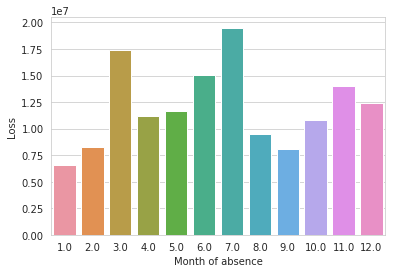

In [431]:
sns.barplot(data=MonthlyLoss,x='Month of absence',y='Loss',ci = None,estimator=sum)
